In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pdb
from numpy import matlib

Generate input data randomly (50 + and 50 -)

In [3]:
X1=np.concatenate((np.random.rand(1,50),np.random.rand(1,50)))  # class '-1'
X2=np.concatenate((np.random.rand(1,50),2+np.random.rand(1,50))) # class '+1'
X=np.concatenate((X1,X2),axis=1)

Output class [-1,+1]

In [17]:
#Adam random X, Y yaptı ondan sonra yarısına -1 diğer yarısına 1 outputunu verdi.
Y=np.concatenate((-np.ones((50,)),np.ones((50,))));

In [18]:
d,N=X.shape

# parameters
lamda=0.01  
maxIter=10000
k=np.int(np.ceil(0.1*N))
Tolerance=10**-6 

w=np.random.rand(1,X.shape[0])
w=w/(np.sqrt(lamda)*np.linalg.norm(w))

This function below is the implementation of the Pegasos algorithm for SVM classification problem. 
Paper referance:
"Pegasos-Primal Estimated sub-Gradient SOlver for SVM" By Shwartz, Singer and Srebro : 2007

<img src="http://users.sussex.ac.uk/~nq28/pegasos.png" alt="The Pegasos Algorithm" width="500"></img>

In [6]:
for t in range(maxIter):
    print('iteration # %d/%d'%(t,maxIter))
    b=np.mean(Y-np.dot(X.T,w[t,:]))
    idx=np.random.randint(0,X.shape[1],size=k)
    At=X[:,idx]
    yt=Y[idx]
    idx1=((np.dot(At.T,w[t,:])+b)*yt)<1
    etat=1./(lamda*(t+1));
    w1=(1.-etat*lamda)*w[t,:] + (etat/k)*np.sum(At[:,idx1]*np.matlib.repmat(yt[idx1],At.shape[0],1),1)
    w = np.vstack((w,np.min(np.array([1,1./(np.sqrt(lamda)*np.linalg.norm(w1))]))*w1))
    if np.linalg.norm(w[t+1,:]-w[t,:]) < Tolerance:
      break

iteration # 0/10000
iteration # 1/10000
iteration # 2/10000
iteration # 3/10000
iteration # 4/10000
iteration # 5/10000
iteration # 6/10000
iteration # 7/10000
iteration # 8/10000
iteration # 9/10000
iteration # 10/10000
iteration # 11/10000
iteration # 12/10000
iteration # 13/10000
iteration # 14/10000
iteration # 15/10000
iteration # 16/10000
iteration # 17/10000
iteration # 18/10000
iteration # 19/10000
iteration # 20/10000
iteration # 21/10000
iteration # 22/10000
iteration # 23/10000
iteration # 24/10000
iteration # 25/10000
iteration # 26/10000
iteration # 27/10000
iteration # 28/10000
iteration # 29/10000
iteration # 30/10000
iteration # 31/10000
iteration # 32/10000
iteration # 33/10000
iteration # 34/10000
iteration # 35/10000
iteration # 36/10000
iteration # 37/10000
iteration # 38/10000
iteration # 39/10000
iteration # 40/10000
iteration # 41/10000
iteration # 42/10000
iteration # 43/10000
iteration # 44/10000
iteration # 45/10000
iteration # 46/10000
iteration # 47/10000
it

<ipython-input-6-65b358cb4f16>:10: RuntimeWarning: divide by zero encountered in double_scalars
  w = np.vstack((w,np.min(np.array([1,1./(np.sqrt(lamda)*np.linalg.norm(w1))]))*w1))


In [7]:
if t<maxIter:
    print('W converged in %d iterations.'%t);
else:
    print('W not converged in %d iterations.'%maxIter);


W converged in 9999 iterations.


In [15]:
wT = w[t,:]
b=np.mean(Y-np.dot(X.T,wT))
b
X

array([[0.40524233, 0.9211359 , 0.20743348, 0.29098219, 0.911157  ,
        0.50404482, 0.96273663, 0.37004489, 0.19006494, 0.41026712,
        0.16905182, 0.37881519, 0.14353849, 0.19951641, 0.99084944,
        0.30067127, 0.3304368 , 0.42298225, 0.53578817, 0.99141143,
        0.87578389, 0.51754862, 0.43135197, 0.46773635, 0.3863875 ,
        0.78087986, 0.70167342, 0.70936801, 0.11738986, 0.92245184,
        0.07680866, 0.1229945 , 0.01457349, 0.17541545, 0.44096887,
        0.39334146, 0.77930001, 0.18282115, 0.14879089, 0.48045906,
        0.88504712, 0.07842063, 0.51304697, 0.28376625, 0.50806317,
        0.27002452, 0.68609702, 0.76424986, 0.92222134, 0.44926524,
        0.51148985, 0.44934465, 0.98004928, 0.84299023, 0.30168601,
        0.13151293, 0.56134889, 0.28274302, 0.48860659, 0.08105077,
        0.88348514, 0.83495257, 0.60067633, 0.67326915, 0.44788288,
        0.5062061 , 0.76688183, 0.02335053, 0.62889703, 0.31394311,
        0.56843749, 0.03668002, 0.43904416, 0.63

**Predict** classes

In [9]:
ytag=np.dot(X.T,wT)+b
ytag

array([-1.13299481, -1.5042361 , -2.90198072, -1.17182862, -2.62174734,
       -1.04030027, -1.20944732, -2.6236903 , -2.33810357, -1.15894393,
       -2.56065803, -1.80889923, -1.25304241, -2.48342038, -1.91883369,
       -1.93712214, -1.24364807, -1.77866505, -2.5687758 , -1.21764099,
       -2.35489738, -1.20832624, -1.24271329, -1.41532815, -2.40777078,
       -2.80814816, -2.6017119 , -2.13054642, -1.35550049, -2.73617061,
       -2.88514081, -1.44115617, -1.82331305, -2.18359359, -2.62927195,
       -1.46599628, -2.62787085, -1.10426896, -1.51005917, -1.07278404,
       -2.90021992, -1.09969269, -2.40294854, -2.06270089, -1.24164546,
       -2.0584735 , -2.22775841, -1.79537369, -2.18030066, -1.15333524,
        2.00896575,  1.66157902,  1.26432866,  2.81049898,  2.73529561,
        2.72478726,  2.1588026 ,  1.29499604,  1.72126423,  1.25646974,
        2.89974656,  1.91791862,  1.29638478,  1.90614589,  1.73422583,
        2.25702804,  1.15395957,  0.99958078,  1.46111379,  1.35

**Calculate** number of incorrect prediction

In [10]:
errors = np.sum(np.sign(ytag)!=Y)
print("errors %.2f"%errors)

errors 0.00


Plot the linear decision boundary

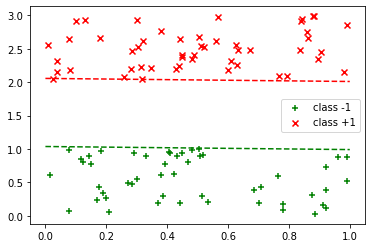

In [11]:
plt.scatter(X1[0,:],X1[1,:],c="g",marker="+",label="class -1")
plt.scatter(X2[0,:],X2[1,:],c="r",marker="x",label="class +1")

#show linear classification boundary
xcoord = np.array([0.0,1.0])
m = -wT[0] / wT[1]
ycoord = m*xcoord - (b/wT[1])
yy_down = m*xcoord - (1+b)/wT[1]
yy_up = m*xcoord + (1-b)/wT[1]

plt.plot(xcoord,ycoord)
plt.plot(xcoord, yy_up, 'r--')
plt.plot(xcoord, yy_down, 'g--')
plt.legend()
plt.show()